# Flower Prediction- L1

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np
import shutil
import pandas as pd

In [3]:
path = Path('/home/h/.fastai/data/oxford-102-flowers')

In [4]:
np.random.seed(2)

In [5]:
FILES = ['train', 'valid', 'test']

In [6]:
def move_files(t):
    csv = path/(t+'.txt')
    df = pd.read_csv(csv, sep=' ', header=None)

    for i, r in df.iterrows():
        label = r[1]
        folder = path/t/str(label)
        Path(folder).mkdir(parents=True, exist_ok=True)
        file = r[0]
        filename = r[0].replace('jpg/','')
        shutil.copyfile(path/file, folder/filename)

In [ ]:
for x in FILES: move_files(x)

In [7]:
data = ImageDataBunch.from_folder(path, no_check=True, ds_tfms=get_transforms(), size=250, bs=16, num_workers=16).normalize()

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [21]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-02


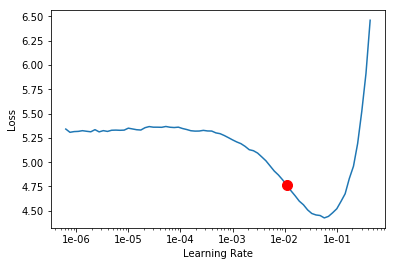

In [23]:
learn.recorder.plot()

In [24]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,4.184518,2.217014,0.434314
2,2.380829,1.180612,0.305882
3,1.450760,0.841634,0.200980
4,0.874201,0.679871,0.178431
5,0.467318,0.460363,0.128431
6,0.276419,0.366449,0.091176
7,0.136290,0.296338,0.073529
8,0.083949,0.283718,0.066667


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.most_confused(min_val=1)